In [6]:
import pandas as pd 
import numpy as np
# VISUALISATION LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

# MODEL EVALUATION
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# SUPPRESS WARNINGS
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="darkgrid")


In [7]:
df = pd.read_csv (r"C:\Users\puja0\Downloads\Datasets\CN_Mobiles+-+Data.csv")
df.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_PHN,PURCHASE
0,00001Q15YJ,50,M,445344.000000,439,0
1,00003I71CQ,35,M,107634.000000,283,0
2,00003N47FS,59,F,502786.666667,390,1
3,00005H41DE,43,M,585664.000000,475,0
4,00007E17UM,39,F,705722.666667,497,1


In [8]:
df.shape

(40000, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          40000 non-null  object 
 1   CURR_AGE    40000 non-null  int64  
 2   GENDER      40000 non-null  object 
 3   ANN_INCOME  40000 non-null  float64
 4   AGE_PHN     40000 non-null  int64  
 5   PURCHASE    40000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ MB


In [10]:
df.describe()

,CURR_AGE,ANN_INCOME,AGE_PHN,PURCHASE
count,40000.00000,40000.000000,40000.000000,40000.000000
mean,44.99745,359398.878050,359.080250,0.575775
std,11.82008,175109.262950,203.063724,0.494231
min,25.00000,70089.000000,1.000000,0.000000
25%,35.00000,219766.000000,235.000000,0.000000
50%,45.00000,337656.833333,331.000000,1.000000
75%,55.00000,464261.000000,444.000000,1.000000
max,65.00000,799970.666667,1020.000000,1.000000


### EDA

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df.isnull().sum()

ID            0
CURR_AGE      0
GENDER        0
ANN_INCOME    0
AGE_PHN       0
PURCHASE      0
dtype: int64

In [13]:
df['GENDER'].value_counts()

GENDER
M    22285
F    17715
Name: count, dtype: int64

In [14]:
df['PURCHASE'].value_counts()

PURCHASE
1    23031
0    16969
Name: count, dtype: int64

In [15]:
df['GENDER']=df['GENDER'].replace(np.nan,'PURCHASE')

In [16]:
df['CURR_AGE'].value_counts()

CURR_AGE
46    1027
36    1026
64    1015
34    1013
62    1008
31    1005
43    1002
59    1001
53     995
55     993
60     992
27     990
33     990
42     989
28     987
39     985
30     984
51     980
56     979
47     979
50     976
29     974
52     974
38     972
63     972
40     967
45     966
48     965
54     962
32     960
37     959
65     955
41     954
35     952
44     951
49     941
26     941
58     940
61     937
25     930
57     912
Name: count, dtype: int64

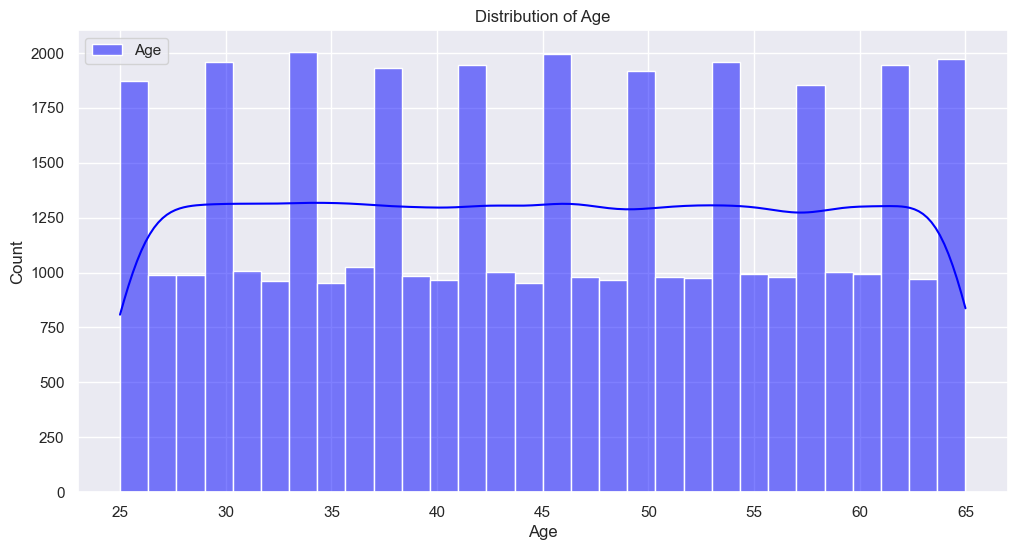

In [17]:
# Plot distributions
plt.figure(figsize=(12, 6))
sns.histplot(df['CURR_AGE'], bins=30, kde=True, color='blue', label='Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.legend()
plt.show()

In [114]:
# Define custom income bins (adjust based on data distribution)
bins = [0, 25000, 50000, 100000, 200000, df['ANN_INCOME'].max()]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Apply categorization
df['Income_Category'] = pd.cut(df['ANN_INCOME'], bins=bins, labels=labels, include_lowest=True)

# View distribution
print(df[['ANN_INCOME', 'Income_Category']].head())

      ANN_INCOME Income_Category
0  445344.000000       Very High
1  107634.000000            High
2  502786.666667       Very High
3  585664.000000       Very High
4  705722.666667       Very High


<Axes: xlabel='Income_Category', ylabel='count'>

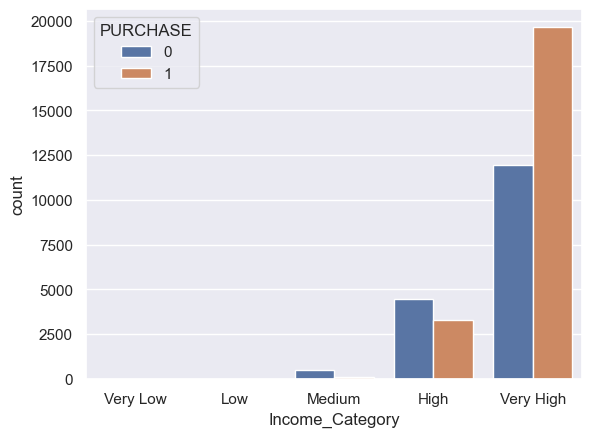

In [115]:
sns.countplot(data=df,x='Income_Category',hue='PURCHASE')

In [117]:
print(df['CURR_AGE'].max())

65


In [118]:
# Define custom income bins (adjust based on data distribution)
bins = [0, 18, 30, 45, 60, df['CURR_AGE'].max()]  
labels = ['0-18(Teenagers)', '19-30(Young Adults)', '31-45(Adults)', '46-60(Middle-Aged)', '61+(Seniors)']

# Apply categorization
df['Age_Category'] = pd.cut(df['CURR_AGE'], bins=bins,labels=labels,include_lowest=True)

# View distribution
print(df[['CURR_AGE', 'Age_Category']].head())

   CURR_AGE        Age_Category
0        50  46-60(Middle-Aged)
1        35       31-45(Adults)
2        59  46-60(Middle-Aged)
3        43       31-45(Adults)
4        39       31-45(Adults)


<Axes: xlabel='Age_Category', ylabel='count'>

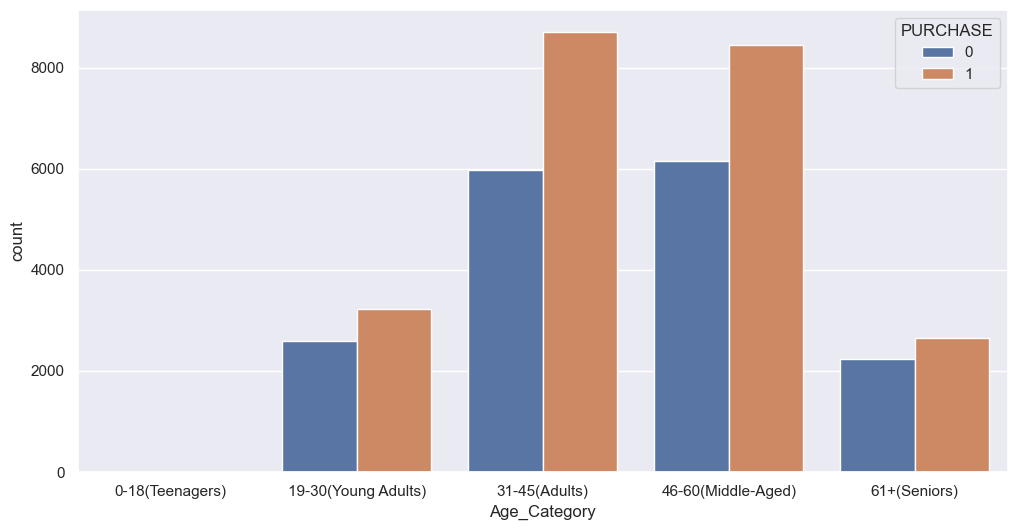

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Age_Category',hue='PURCHASE')

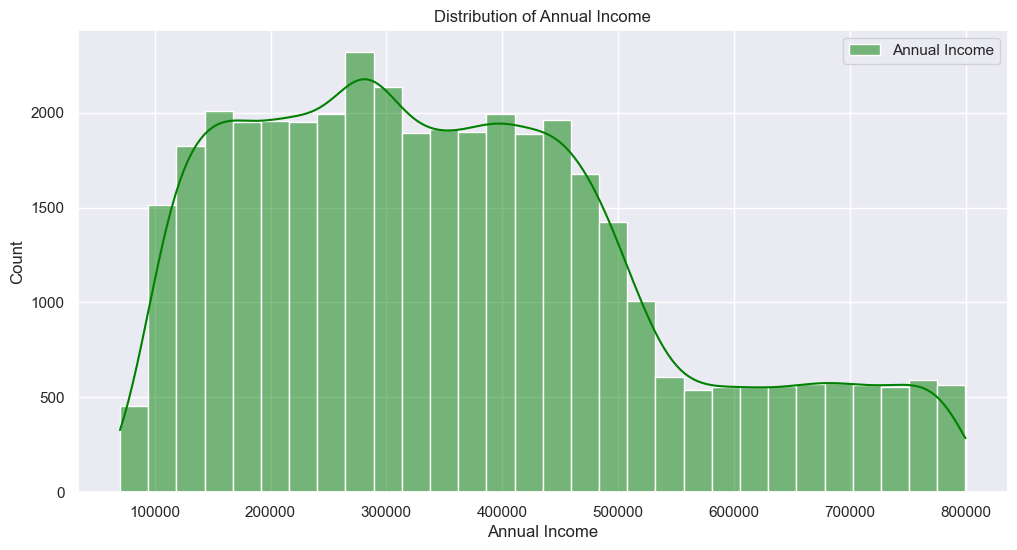

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df['ANN_INCOME'], bins=30, kde=True, color='green', label='Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income')
plt.legend()
plt.show()

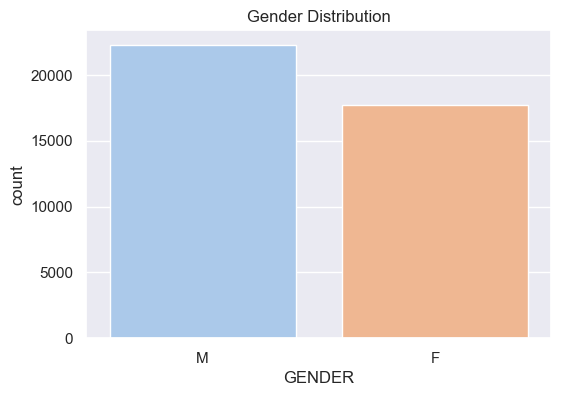

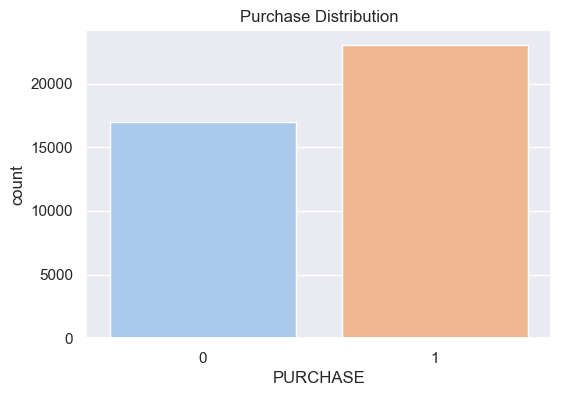

In [19]:
# Countplot for categorical variable GENDER
plt.figure(figsize=(6, 4))
sns.countplot(x='GENDER', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.show()

# Countplot for PURCHASE
plt.figure(figsize=(6, 4))
sns.countplot(x='PURCHASE', data=df, palette='pastel')
plt.title('Purchase Distribution')
plt.show()

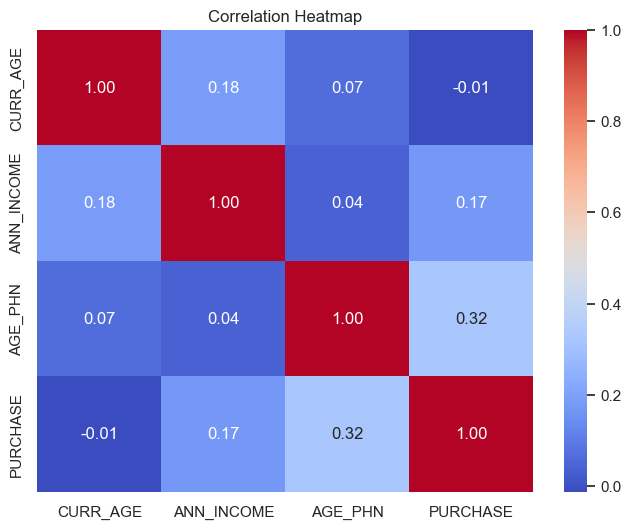

In [20]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## Summary Statistics:

Age ranges from 25 to 65 years, with an average of ~45 years.
Annual income varies from ~70K to ~800K, with an average of ~359K.
Phone age ranges from 1 to 1020 days, averaging around 359 days.
57.6% of the customers made a purchase.


Distribution Insights:

Age: Most customers are between 35-55 years.
Annual Income: Right-skewed distribution, meaning some customers earn significantly more than the average.
Gender: Appears balanced in distribution.
Purchases: More people have made a purchase than not.


Correlation Analysis:

Purchase likelihood is slightly positively correlated with income.
Phone age and purchase have a weak relationship, meaning customers may not necessarily buy a new phone just because theirs is old.

In [21]:
# Mean of CURR_AGE column
mean_age = df['CURR_AGE'].mean()
print("Mean Age:", mean_age)

# Mean of ANN_INCOME column
mean_income = df['ANN_INCOME'].mean()
print("Mean Annual Income:", mean_income)


Mean Age: 44.99745
Mean Annual Income: 359398.87805


AttributeError: module 'matplotlib.pyplot' has no attribute 'Xlabel'

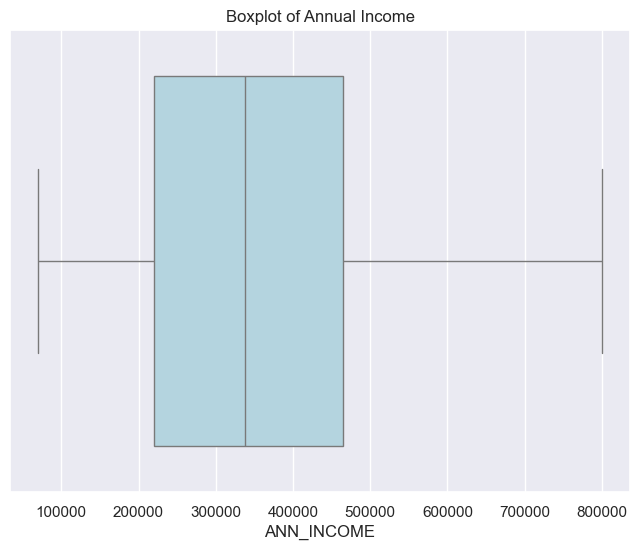

In [22]:
plt.figure(figsize = (8,6))
sns.boxplot(x=df['ANN_INCOME'],color = 'lightblue')
plt.title('Boxplot of Annual Income')
plt.Xlabel('Annual Income')
plt.show()

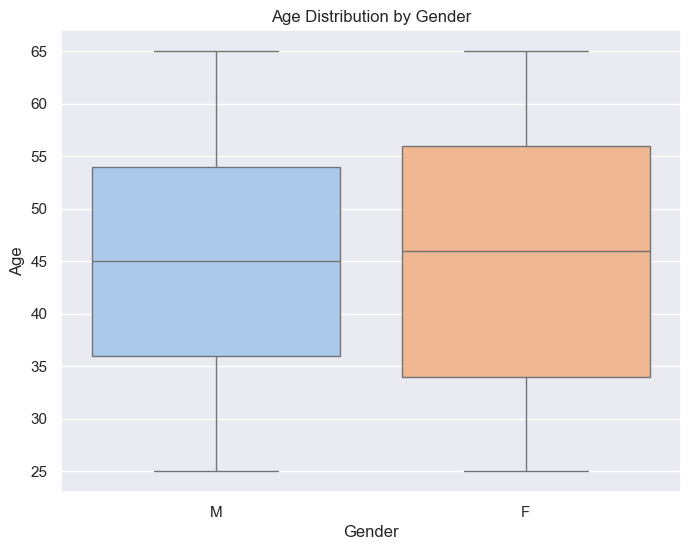

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='GENDER', y='CURR_AGE', data=df, palette='pastel')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


In [25]:
## independent features and dependent features
X = df[['ANN_INCOME', 'AGE_PHN']]
Y = df['PURCHASE']

In [26]:
Y

0        0
1        0
2        1
3        0
4        1
        ..
39995    1
39996    0
39997    1
39998    1
39999    1
Name: PURCHASE, Length: 40000, dtype: int64

In [27]:
## trai test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30, random_state = 42)

In [28]:
X_train

,ANN_INCOME,AGE_PHN
38015,293466.666667,291
2281,264412.000000,771
36629,356960.000000,787
6087,757996.000000,416
11792,106968.000000,815
...,...,...
6265,287185.000000,169
11284,225808.000000,224
38158,766121.000000,313
860,295184.000000,451


In [124]:
Y_train

array([0, 0, 1, ..., 1, 0, 0])

In [29]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)

In [30]:
X_test = Scaler.transform(X_test)

In [31]:
## cross validation

from sklearn.model_selection import cross_val_score



In [32]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [33]:
## trai test split
mse = cross_val_score(regression,X_train,Y_train,scoring = 'neg_mean_squared_error',cv=5)

In [34]:
np.mean(mse)

-0.2138395470017243

In [35]:
## prediction
reg_pred = regression.predict(X_test)

In [36]:
reg_pred

array([0.44651165, 0.46350869, 0.51145201, ..., 0.46776995, 0.67608909,
       0.51791627])

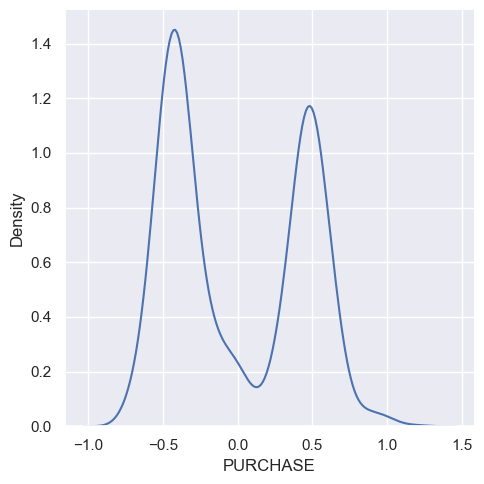

In [37]:
sns.displot(reg_pred-Y_test,kind = 'kde')

In [38]:
from sklearn.metrics import r2_score

In [39]:
score = r2_score(reg_pred,Y_test)

In [40]:
score

-5.7412031778544685

In [41]:
dummy = pd.get_dummies(df[['CURR_AGE','GENDER','ANN_INCOME','AGE_PHN','PURCHASE']], 
                       drop_first=True)

# Ensuring all dummy variables are integers
dummy = dummy.astype(int)

# Displaying the first few rows
dummy.head()



,CURR_AGE,ANN_INCOME,AGE_PHN,PURCHASE,GENDER_M
0,50,445344,439,0,1
1,35,107634,283,0,1
2,59,502786,390,1,0
3,43,585664,475,0,1
4,39,705722,497,1,0


In [42]:
# Concatenating with X
X = pd.concat([X, dummy], axis=1)
# Displaying the first few rows
X.head()

,ANN_INCOME,AGE_PHN,CURR_AGE,ANN_INCOME,AGE_PHN,PURCHASE,GENDER_M
0,445344.000000,439,50,445344,439,0,1
1,107634.000000,283,35,107634,283,0,1
2,502786.666667,390,59,502786,390,1,0
3,585664.000000,475,43,585664,475,0,1
4,705722.666667,497,39,705722,497,1,0


In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=50)

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ANN_INCOME  40000 non-null  float64
 1   AGE_PHN     40000 non-null  int64  
 2   CURR_AGE    40000 non-null  int32  
 3   ANN_INCOME  40000 non-null  int32  
 4   AGE_PHN     40000 non-null  int32  
 5   PURCHASE    40000 non-null  int32  
 6   GENDER_M    40000 non-null  int32  
dtypes: float64(1), int32(5), int64(1)
memory usage: 1.4 MB


We're checking correlation to identify relationships between features and avoid
multicollinearity, which can negatively impact model performance. It helps in
feature selection and improving predictive accuracy.

In [45]:
print(X.columns.duplicated().sum())  # Count duplicate column names


2


In [46]:
X = X.loc[:, ~X.columns.duplicated()]  # Remove duplicate column names


In [47]:
print(X.columns.duplicated().sum())  

0


In [48]:
# Compute correlation matrix
conv_corr = X.corr()

# Unstack the correlation matrix
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")

# Extract upper triangle of correlation matrix without diagonal
top_corr = conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(bool)).stack().sort_values(ascending=False)

# Display top 10 correlations
print(top_corr.head(10))

AGE_PHN     PURCHASE    0.321320
ANN_INCOME  CURR_AGE    0.184890
            PURCHASE    0.169923
AGE_PHN     CURR_AGE    0.065735
ANN_INCOME  AGE_PHN     0.037444
PURCHASE    GENDER_M    0.037053
AGE_PHN     GENDER_M   -0.010891
CURR_AGE    PURCHASE   -0.012129
            GENDER_M   -0.015845
ANN_INCOME  GENDER_M   -0.026632
dtype: float64


In [49]:
def calculate_vif(X_train):
    X_const = sm.add_constant(X_train)
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_const.columns
    vif_df['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    return vif_df[vif_df['VIF']>10]
    
calculate_vif(X)

,Features,VIF
0,const,21.32


## TRAINING THE MODEL

In [50]:
# Add a constant (intercept term) to X_train
X_train_const = sm.add_constant(X_train)
# Fit the logistic regression model using GLM
logm1 = sm.GLM(Y_train, X_train_const, family=sm.families.Binomial())
# Fit the model and get the summary
logm1_fit = logm1.fit()
# Display the model summary with coefficients, p-values, etc.
print(logm1_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               PURCHASE   No. Observations:                28000
Model:                            GLM   Df Residuals:                    27993
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4908e-09
Date:                Mon, 03 Mar 2025   Deviance:                   2.9771e-09
Time:                        20:15:43   Pearson chi2:                 1.49e-09
No. Iterations:                    29   Pseudo R-squ. (CS):             0.7441
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -30.5661   7.61e+04     -0.000      1.0

## FEATURE SELECTION USING RFE

In [51]:
# Define the logistic regression model
lr = LogisticRegression()
# Initialize RFE with the logistic regression model
rfe = RFE(lr, n_features_to_select=17) # Select top 17 features (adjust as needed)
# Fit RFE on training data
rfe=rfe.fit(X_train, Y_train)
# Fit RFE on testing data
rfe=rfe.fit(X_test,Y_test)

In [52]:
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['ANN_INCOME', 'AGE_PHN', 'CURR_AGE', 'ANN_INCOME', 'AGE_PHN',
       'PURCHASE', 'GENDER_M'],
      dtype='object')


## MAKING PREDICTIONS¶

In [53]:
# Add a constant column to the feature set (important for intercept in GLM)
X_train_sm = sm.add_constant(X_train[selected_features])
# Create a logistic regression model using Generalized Linear Model (GLM)
# We specify the family as Binomial since it's a classification problem
logm2 = sm.GLM(Y_train, X_train_sm, family=sm.families.Binomial())
# Fit the model to find the optimal parameters
logm2_fit = logm2.fit()
# Display the model summary with coefficients, p-values, etc.
print(logm2_fit.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               PURCHASE   No. Observations:                28000
Model:                            GLM   Df Residuals:                    27993
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4908e-09
Date:                Mon, 03 Mar 2025   Deviance:                   2.9771e-09
Time:                        20:15:48   Pearson chi2:                 1.49e-09
No. Iterations:                    29   Pseudo R-squ. (CS):             0.7441
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -30.5661   7.61e+04     -0.000      1.0

In [54]:
# Getting the predicted values on the train set
y_train_pred = logm2_fit.predict(X_train_sm)
y_train_pred[:10]

10542    5.312820e-14
23834    1.000000e+00
32854    5.312820e-14
37137    1.000000e+00
2060     5.312820e-14
34733    1.000000e+00
36100    5.312820e-14
5492     1.000000e+00
11803    5.312820e-14
28564    1.000000e+00
dtype: float64

In [55]:
# Create a DataFrame to store the actual values and predicted probabilities
Y_train_pred_final = pd.DataFrame({
'Convert': Y_train.values, # Actual target values (1 = Converted, 0 = Not Converted)
'Convert_Prob': y_train_pred # Predicted probabilities from the model
})
# Add the Prospect ID (index of y_train) for tracking each lead
Y_train_pred_final['Pros_ID'] = Y_train.index
# Display some rows of the resulting DataFrame
Y_train_pred_final[10:15]

,Convert,Convert_Prob,Pros_ID
28700,1,1.000000e+00,28700
38053,1,1.000000e+00,38053
29612,0,5.312820e-14,29612
19124,1,1.000000e+00,19124
35201,1,1.000000e+00,35201


In [56]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
Y_train_pred_final['predicted'] = Y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see
Y_train_pred_final.loc[10:15]

,Convert,Convert_Prob,Pros_ID,predicted
10,0,5.312820e-14,10,0
27315,1,1.000000e+00,27315,1
4684,0,5.312820e-14,4684,0
26984,0,5.312820e-14,26984,0
15421,0,5.312820e-14,15421,0
...,...,...,...,...
21034,0,5.312820e-14,21034,0
22224,1,1.000000e+00,22224,1
15113,1,1.000000e+00,15113,1
20557,0,5.312820e-14,20557,0


Text(0.5, 1.0, 'Distribution of Predicted Values')

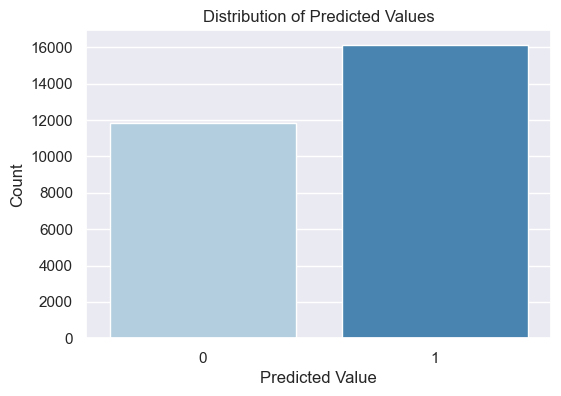

In [57]:
# Count plot of predicted values
plt.figure(figsize=(6, 4))
sns.countplot(x=Y_train_pred_final['predicted'], palette='Blues')

# Labels and title
plt.xlabel("Predicted Value")
plt.ylabel("Count")
plt.title("Distribution of Predicted Values")

## cluatering analysis

In [58]:
# Drop ID column
df_cleaned = df.drop(columns=['ID'])


In [59]:
# Encode categorical 'GENDER' column
le = LabelEncoder()
df_cleaned['GENDER'] = le.fit_transform(df_cleaned['GENDER'])

In [60]:


# Standardize numerical columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)


In [61]:
# Apply K-Means clustering
optimal_k = 4  # Change based on Elbow Method analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)


In [62]:
## Evaluate K-Means clustering
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")

### Silhouette Score for K-Means: 0.2618 (indicating moderate cluster separation).


Silhouette Score for K-Means: 0.26175343838326187


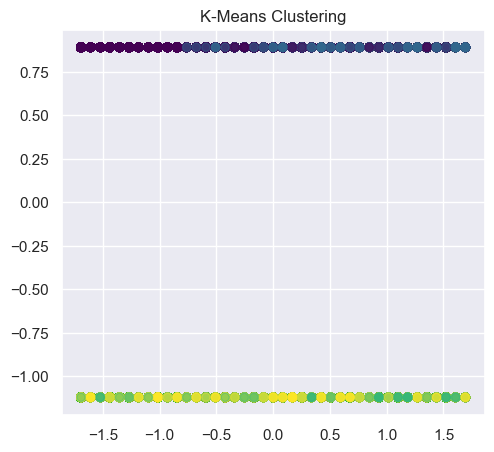

In [64]:
# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title("K-Means Clustering")

plt.show()



### INDIA DATA

In [65]:
# Define file paths
excel_file = r"C:\Users\puja0\Downloads\Datasets\IN_Mobiles+-+Data.xlsx"
csv_file = r"C:\Users\puja0\Downloads\Datasets\IN_Mobiles_Data.csv"

# Read the Excel file
IN = pd.read_excel(excel_file)

# Save as CSV
df.to_csv(csv_file, index=False)

print("Excel file converted to CSV successfully!")

Excel file converted to CSV successfully!


In [66]:
IN.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_OLD_PURCHASE
0,20710B05XL,54,M,1425390,2018-04-20
1,89602T51HX,47,M,1678954,2018-06-08
2,70190Z52IP,60,M,931624,2017-07-31
3,25623V15MU,55,F,1106320,2017-07-31
4,36230I68CE,32,F,748465,2019-01-27


In [67]:
IN.shape

(70000, 5)

In [68]:
IN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               70000 non-null  object        
 1   CURR_AGE         70000 non-null  int64         
 2   GENDER           70000 non-null  object        
 3   ANN_INCOME       70000 non-null  int64         
 4   DT_OLD_PURCHASE  70000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.7+ MB


In [69]:
IN.isnull().sum()

ID                 0
CURR_AGE           0
GENDER             0
ANN_INCOME         0
DT_OLD_PURCHASE    0
dtype: int64

In [70]:
IN.duplicated().sum()


0

### EDA of india data

<Axes: xlabel='CURR_AGE', ylabel='Count'>

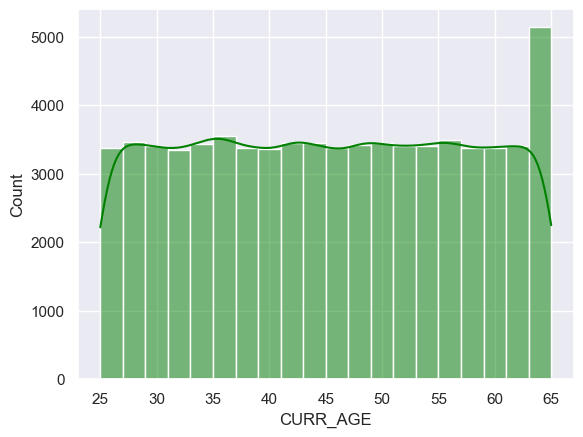

In [123]:
sns.histplot(IN['CURR_AGE'], bins=20, kde=True, color='Green')

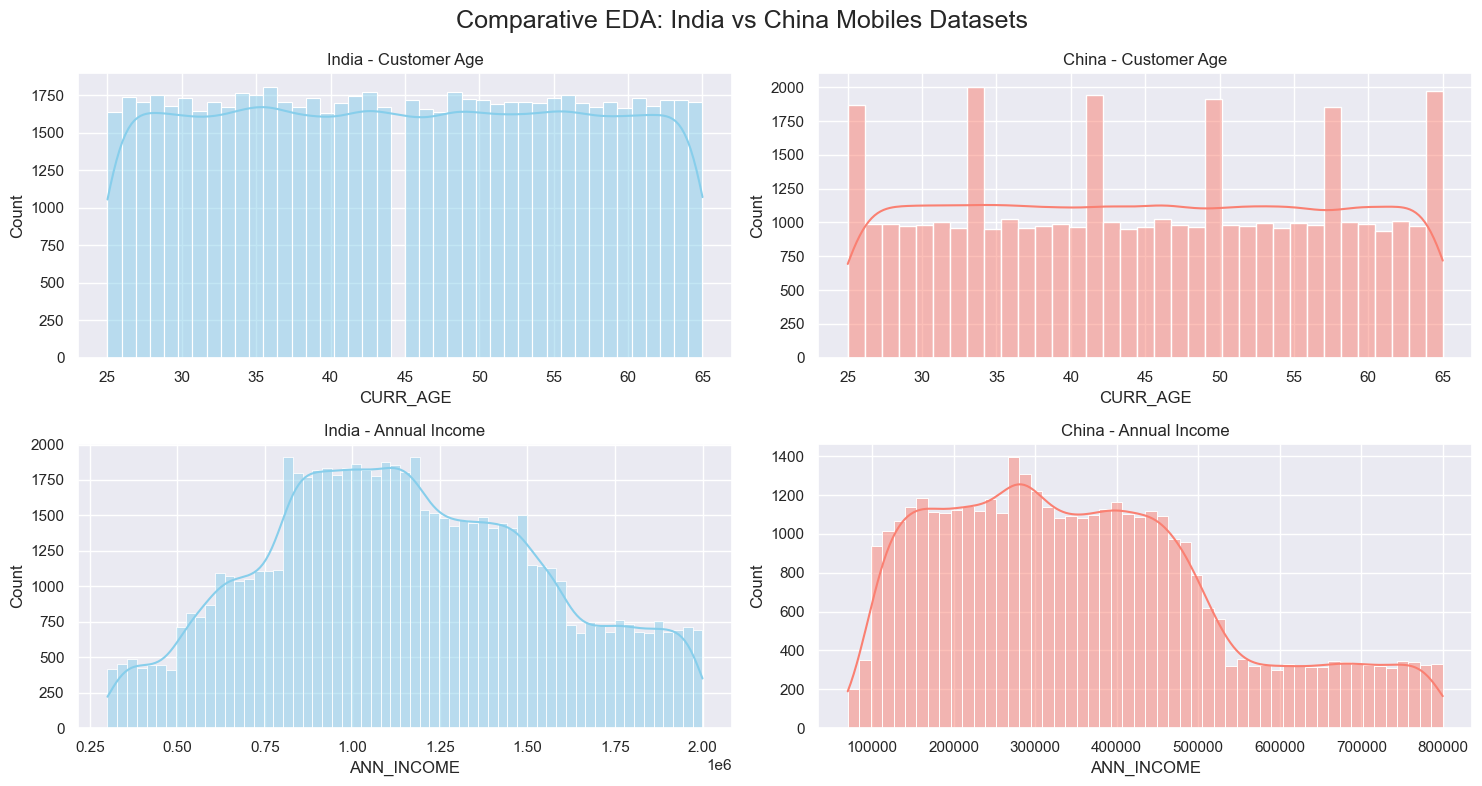

In [101]:
# Comparative EDA between India and China Mobiles Datasets (without Phone Age)
def compare_eda(df, IN):
    fig, axes = plt.subplots(2, 2, figsize=(15, 8))
    fig.suptitle('Comparative EDA: India vs China Mobiles Datasets', fontsize=18)

    # Customer Age Distribution
    sns.histplot(IN['CURR_AGE'], kde=True, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('India - Customer Age')
    sns.histplot(df['CURR_AGE'], kde=True, ax=axes[0, 1], color='salmon')
    axes[0, 1].set_title('China - Customer Age')

    # Annual Income Distribution
    sns.histplot(IN['ANN_INCOME'], kde=True, ax=axes[1, 0], color='skyblue')
    axes[1, 0].set_title('India - Annual Income')
    sns.histplot(df['ANN_INCOME'], kde=True, ax=axes[1, 1], color='salmon')
    axes[1, 1].set_title('China - Annual Income')

    plt.tight_layout()
    plt.show()

# Run the EDA comparison (make sure your datasets are loaded as df and IN)
compare_eda(df, IN)



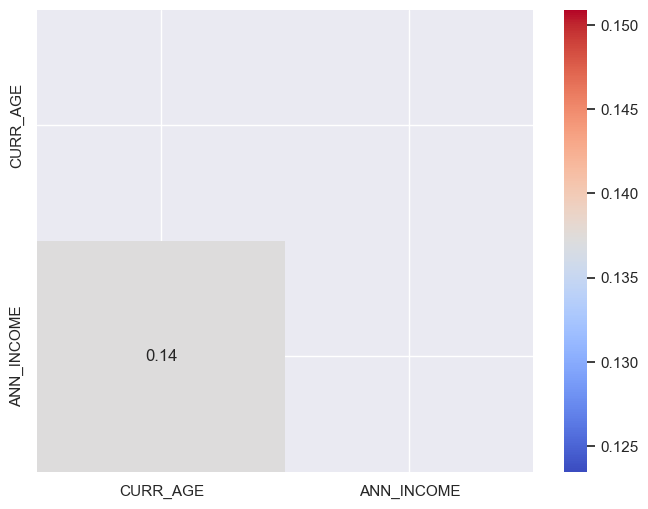

In [110]:
# Correlation
df_corr = IN.select_dtypes(include='number').corr()

# Plot
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, mask=mask, annot=True, cmap='coolwarm')
plt.show()

In [129]:
in_df_encoded = pd.get_dummies(IN,columns=['GENDER'])

In [130]:
in_df_encoded

,ID,CURR_AGE,ANN_INCOME,DT_OLD_PURCHASE,GENDER_F,GENDER_M
0,20710B05XL,54,1425390,2018-04-20,False,True
1,89602T51HX,47,1678954,2018-06-08,False,True
2,70190Z52IP,60,931624,2017-07-31,False,True
3,25623V15MU,55,1106320,2017-07-31,True,False
4,36230I68CE,32,748465,2019-01-27,True,False
...,...,...,...,...,...,...
69995,35280V26PS,49,861770,2018-04-08,True,False
69996,79863N01VR,59,888976,2018-05-17,False,True
69997,94236O99QE,33,699676,2019-04-21,False,True
69998,23696V12DP,41,1881922,2018-07-14,False,True


In [131]:
in_df_encoded.drop(['GENDER_M'],axis=1,inplace=True)

In [132]:
in_df_encoded

,ID,CURR_AGE,ANN_INCOME,DT_OLD_PURCHASE,GENDER_F
0,20710B05XL,54,1425390,2018-04-20,False
1,89602T51HX,47,1678954,2018-06-08,False
2,70190Z52IP,60,931624,2017-07-31,False
3,25623V15MU,55,1106320,2017-07-31,True
4,36230I68CE,32,748465,2019-01-27,True
...,...,...,...,...,...
69995,35280V26PS,49,861770,2018-04-08,True
69996,79863N01VR,59,888976,2018-05-17,False
69997,94236O99QE,33,699676,2019-04-21,False
69998,23696V12DP,41,1881922,2018-07-14,False


In [133]:
in_df_encoded['GENDER_F']=in_df_encoded['GENDER_F'].replace({True:1,False:0})

In [134]:
in_df_encoded

,ID,CURR_AGE,ANN_INCOME,DT_OLD_PURCHASE,GENDER_F
0,20710B05XL,54,1425390,2018-04-20,0
1,89602T51HX,47,1678954,2018-06-08,0
2,70190Z52IP,60,931624,2017-07-31,0
3,25623V15MU,55,1106320,2017-07-31,1
4,36230I68CE,32,748465,2019-01-27,1
...,...,...,...,...,...
69995,35280V26PS,49,861770,2018-04-08,1
69996,79863N01VR,59,888976,2018-05-17,0
69997,94236O99QE,33,699676,2019-04-21,0
69998,23696V12DP,41,1881922,2018-07-14,0


In [137]:
print(in_df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               70000 non-null  object        
 1   CURR_AGE         70000 non-null  int64         
 2   ANN_INCOME       70000 non-null  int64         
 3   DT_OLD_PURCHASE  70000 non-null  datetime64[ns]
 4   GENDER_F         70000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.7+ MB
None


In [138]:
x_in=in_df_encoded.drop(columns=['ID','DT_OLD_PURCHASE'])

In [141]:
x_in

,CURR_AGE,ANN_INCOME,GENDER_F
0,54,1425390,0
1,47,1678954,0
2,60,931624,0
3,55,1106320,1
4,32,748465,1
...,...,...,...
69995,49,861770,1
69996,59,888976,0
69997,33,699676,0
69998,41,1881922,0


In [151]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
IN['GENDER'] = le.fit_transform(IN['GENDER'])

# Features and target (adjust column names as per your dataset)
X = IN[['ANN_INCOME', 'CURR_AGE']]  # example features
y = IN['GENDER']  # target variable


# 🔹 Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Step 3: Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# 🔹 Step 4: Predictions on the full dataset (or new data)
india_predictions = model.predict(X)
india_probabilities = model.predict_proba(X)[:, 1]  # probability of purchase (class 1)

# 🔹 Step 5: Add predictions to the dataframe
IN['Predicted_Purchase'] = india_predictions
IN['Purchase_Probability'] = india_probabilities

#  Step 6: Show result
print(IN[['ANN_INCOME', 'CURR_AGE', 'Predicted_Purchase', 'Purchase_Probability']].head())

   ANN_INCOME  CURR_AGE  Predicted_Purchase  Purchase_Probability
0     1425390        54                   1              0.520245
1     1678954        47                   1              0.582354
2      931624        60                   0              0.425637
3     1106320        55                   0              0.469058
4      748465        32                   0              0.497597


### CHINA DATA PREDICTION

In [153]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])

# Features and target (adjust column names as per your dataset)
X = df[['ANN_INCOME', 'CURR_AGE']]  # example features
y = df['GENDER']  # target variable


# 🔹 Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Step 3: Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# 🔹 Step 4: Predictions on the full dataset (or new data)
india_predictions = model.predict(X)
india_probabilities = model.predict_proba(X)[:, 1]  # probability of purchase (class 1)

# 🔹 Step 5: Add predictions to the dataframe
df['Predicted_Purchase'] = india_predictions
df['Purchase_Probability'] = india_probabilities

#  Step 6: Show result
print(df[['ANN_INCOME', 'CURR_AGE', 'Predicted_Purchase', 'Purchase_Probability']].head())

      ANN_INCOME  CURR_AGE  Predicted_Purchase  Purchase_Probability
0  445344.000000        50                   1              0.555815
1  107634.000000        35                   1              0.545367
2  502786.666667        59                   1              0.566431
3  585664.000000        43                   1              0.541906
4  705722.666667        39                   1              0.532712
